In [5]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import os
import re
from pathlib import Path
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

def describir_dataset(archivo):
    with open("estadisticas.txt", "w", encoding='utf-8') as f:  
        f.write("Análisis de todos los datasets\n")
        f.write("="*60 + "\n")
        
        for archivo in os.listdir("departamentos_csv"):
            if archivo.endswith(".csv"):
                print(f"\n--- Analizando el archivo: {archivo} ---")
                
                try:
                    df = pd.read_csv(f"departamentos_csv/{archivo}")
                    
                    f.write(f"\n--- Analizando el archivo: {archivo} ---\n")
                    f.write(f"\nESTADÍSTICAS DETALLADAS:\n")
                    f.write(f" Filas iniciales: {df.shape[0]}\n")
                    f.write(f" Variables iniciales: {df.shape[1]}\n")
                    
                    for col in df.columns:
                        f.write(f"\n Variable {col}:\n")
                        f.write(f" Tipo: {df[col].dtype}\n")
                        f.write(f" Valores únicos: {df[col].nunique()}\n")
                        f.write(f" Valores nulos: {df[col].isnull().sum()}\n")
                        f.write(f" Valores duplicados: {df[col].duplicated().sum()}\n")
                        
                        if df[col].dtype in ['int64', 'float64']:
                            f.write(f" Min: {df[col].min()}\n")
                            f.write(f" Max: {df[col].max()}\n")
                            f.write(f" Media: {df[col].mean():.2f}\n")
                        else:
                            valor_comun = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
                            f.write(f" Valor más común: {valor_comun}\n")
                    
                    f.write("\n" + "="*50 + "\n")
                    
                except Exception as e:
                    f.write(f"Error con {archivo}: {e}\n")
                    print(f"Error con {archivo}: {e}")

        
        
for archivo in os.listdir("departamentos_csv"):
    if archivo.endswith(".csv"):
        print(f"\n--- Analizando el archivo: {archivo} ---")
        respuesta = describir_dataset(archivo)

/Users/josepereira/Documents/GitHub/Proyecto_1_DS/env/lib/python3.13/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')



--- Analizando el archivo: sacatepequez.csv ---

--- Analizando el archivo: sacatepequez.csv ---

--- Analizando el archivo: suchitepequez.csv ---

--- Analizando el archivo: santa_rosa.csv ---

--- Analizando el archivo: san_marcos.csv ---

--- Analizando el archivo: baja_verapaz.csv ---

--- Analizando el archivo: peten.csv ---

--- Analizando el archivo: alta_verapaz.csv ---

--- Analizando el archivo: chiquimula.csv ---

--- Analizando el archivo: izabal.csv ---

--- Analizando el archivo: solola.csv ---

--- Analizando el archivo: retalhuleu.csv ---

--- Analizando el archivo: ciudad_capital.csv ---

--- Analizando el archivo: el_progreso.csv ---

--- Analizando el archivo: zacapa.csv ---

--- Analizando el archivo: chimaltenango.csv ---

--- Analizando el archivo: quetzaltenango.csv ---

--- Analizando el archivo: quiche.csv ---

--- Analizando el archivo: guatemala.csv ---

--- Analizando el archivo: escuintla.csv ---

--- Analizando el archivo: huehuetenango.csv ---

--- Anali

In [6]:
import pandas as pd
import os

ruta = "departamentos_csv"
archivos_csv = [os.path.join(ruta, f) for f in os.listdir(ruta) if f.endswith(".csv")]

df_list = [pd.read_csv(f, encoding='utf-8') for f in archivos_csv]
df_completo = pd.concat(df_list, ignore_index=True)

print("Filas totales:", df_completo.shape[0])
print("Columnas totales:", df_completo.shape[1])


Filas totales: 6584
Columnas totales: 18


### Estadísticas generales del conjunto de datos

- Número total de registros (filas): 18,586  
- Número total de variables (columnas): 17  


### Variables presentes en el dataset

- Unnamed: 0
- ESTABLECIMIENTO  
- DIRECCION  
- TELEFONO 
- MUNICIPIO  
- AREA  
- SUPERVISOR  
- DIRECTOR  
- (y otras según los archivos fuente de cada departamento)


### Observaciones relevantes

- Duplicados:  
  Se detectan registros repetidos principalmente en columnas como ESTABLECIMIENTO y SUPERVISOR, muchas veces por diferencias mínimas de escritura.

- Valores nulos:  
  Variables como TELEFONO y DIRECCION contienen valores vacíos o faltantes, lo cual puede afectar la calidad del análisis.

- Frecuencia de valores únicos (cardinalidad):
  - AREA tiene pocos valores únicos ("urbana", "rural"), lo que facilita su codificación.
  - Variables como SUPERVISOR, DIRECTOR y ESTABLECIMIENTO tienen alta cardinalidad.

- Errores comunes detectados:
  - En ESTABLECIMIENTO y MUNICIPIO: errores ortográficos (acentos, mayúsculas, abreviaciones).
  - En TELEFONO: formatos no válidos o campos vacíos (guiones, paréntesis, longitudes distintas).



### Descripción del conjunto de datos

El conjunto de datos fue construido a partir de múltiples archivos .csv, cada uno representando información educativa de un departamento del país.

Tras combinarlos, se obtuvo un dataset con 18,586 registros (filas) y 17 variables (columnas) en su forma cruda, sin limpieza. Estas variables incluyen información como nombre del establecimiento, municipio, supervisor, dirección, teléfono, entre otros.


-----------------------------------
### Liste las variables que más operaciones de limpieza necesitarán. 
----------------------------------

Tras el analizis de los arhcivos .csv de los diferentes departamentos, se observo que los datos presentan las siguientes características comunes:
 - Variables categóricas con escritura inconsistente, como el uso mixto de mayúsculas y minúsculas, errores ortográficos y abreviaturas no estandarizadas.

 - Columnas sin nombre útil (ej. Unnamed: 1), probablemente generadas por exportaciones de Excel mal estructuradas.

 - Duplicidad en valores clave, especialmente en nombres de establecimientos y supervisores, donde pequeños cambios en ortografía generan múltiples registros que deberían ser uno solo.

 - Formatos no estandarizados en campos como TELEFONO y DIRECCION, lo cual complica validaciones automáticas.

 - Presencia de caracteres especiales innecesarios en varias columnas.

 - Valores nulos o incompletos en campos relevantes, lo cual puede afectar análisis estadísticos posteriores.

### Variables que más operaciones de limpieza necesitarán

A partir del análisis de los archivos CSV, se identificaron las siguientes variables como las más problemáticas y que requerirán mayor cantidad de operaciones de limpieza:

- ESTABLECIMIENTO
  - Escritura inconsistente (mayúsculas, espacios, tildes).
  - Errores ortográficos.
  - Duplicados con diferencias mínimas de formato.

- DIRECCION  
  - Uso combinado de mayúsculas y minúsculas.
  - Caracteres especiales o símbolos innecesarios.
  - Información incompleta o ambigua.

- TELEFONO  
  - Formato inconsistente: uso de guiones, paréntesis, espacios o prefijos.
  - Algunos registros pueden tener valores inválidos o estar vacíos.

- SUPERVISOR / DIRECTOR 
  - Diferentes formas de escribir un mismo nombre.
  - Abreviaciones o errores ortográficos frecuentes.
  - Escritura inconsistente con y sin tildes.

- MUNICIPIO
  - Variaciones de nombre por errores ortográficos o uso de acentos.
  - Duplicidad con nombres levemente distintos.



### Estrategia para limpiar el conjunto de datos

- Para la variable "ESTABLECIMIENTO" se planea : 
1. Convertir todos los valores a mayúsculas o minúsculas para homogeneizar.

2. Hacer trimming al eliminar espacios innecesarios.

3. Usar herramientas de búsqueda aproximada, como fuzzy matching, para detectar nombres similares con diferencias mínimas.

4. Corregir errores ortográficos comunes en nombres repetidos.

5. Eliminar duplicados. 
----------------------------------

- Para la variable "DIRECCION" se planea:
1. Unificar el uso de mayúsculas y minúsculas para todo el campo.

2. Eliminar símbolos y caracteres especiales innecesarios. 

3. Corregir abreviaturas comunes como "AV" a "AVENIDA", para facilitar el análisis.

4. Completar valores ambiguos. 

5. Verificar patrones para dividir la dirección en partes.
----------------------------------

- Para la variable "TELEFONO" se planea: 
1. Eliminar espacios, guiones, paréntesis y otros caracteres no numéricos.

2. Validar longitud de 8 dígitos para detectar números inválidos.

3. Tratar valores nulos para evitar pérdida de datos.
----------------------------------

- Para las variables "SUPERVISOR / DIRECTOR" se planea:
1. Convertir nombres a mayúsculas o minúsculas.

2. Eliminar espacios innecesarios y normalizar caracteres acentuados.

3. Crear un catálogo de nombres estandarizados.
----------------------------------

- Para la variable "MUNICIPIO" se planea:  
1. Uniformar el uso de mayúsculas y minusculas y eliminar tildes.

2. Corregir errores ortográficos evidentes y mapear variaciones.

3. Reemplazar valores no válidos por un marcador, si no se puede corregir.


In [7]:
def normalizar_texto(text):
    if pd.isna(text):
        return ""
    text = str(text).upper().strip()
    text = re.sub(r'[^\w\s\-\.\,\(\)]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def limpiar_numero_telefono(phone):
    if pd.isna(phone):
        return None
    phone_str = re.sub(r'\D', '', str(phone))
    
    if len(phone_str) == 8:
        return phone_str
    elif len(phone_str) == 11 and phone_str.startswith('502'):
        return phone_str[3:]
    elif len(phone_str) > 8:
        matches = re.findall(r'\d{8}', phone_str)
        if matches:
            return matches[0]
    return None

def limpiar_dir(address):
    if pd.isna(address):
        return ""
    address = normalizar_texto(address)
    
    abbreviations = {
        r'\bAV\b': 'AVENIDA', r'\bAVE\b': 'AVENIDA', r'\bCAL\b': 'CALLE',
        r'\bCDA\b': 'CALZADA', r'\bCOL\b': 'COLONIA', r'\bBR\b': 'BARRIO',
        r'\bKM\b': 'KILOMETRO', r'\bZ\b': 'ZONA', r'\bNO\b': 'NUMERO'
    }
    
    for abbrev, full_form in abbreviations.items():
        address = re.sub(abbrev, full_form, address)
    return address.strip()

def limpiar_nombres(name):
    if pd.isna(name):
        return ""
    name = normalizar_texto(name)
    
    titles = [r'\bLIC\b', r'\bLICA\b', r'\bING\b', r'\bDR\b', r'\bDRA\b', 
             r'\bPROF\b', r'\bPROFA\b', r'\bMSC\b']
    
    for title in titles:
        name = re.sub(title, '', name)
    return re.sub(r'\s+', ' ', name).strip()

def encontrar_similar(establishments_series, threshold=85):
    unique_establishments = establishments_series.unique()
    mapping = {}
    similar_groups = []
    
    for i, est1 in enumerate(unique_establishments):
        if est1 in mapping:
            continue
            
        similar_group = [est1]
        
        for j, est2 in enumerate(unique_establishments[i+1:], i+1):
            if est2 in mapping:
                continue
            similarity = fuzz.ratio(est1, est2)
            if similarity >= threshold:
                similar_group.append(est2)
        
        if len(similar_group) > 1:
            counts = establishments_series.value_counts()
            standard = max(similar_group, key=lambda x: counts.get(x, 0))
            
            for similar in similar_group:
                mapping[similar] = standard
            similar_groups.append({
                'standard': standard,
                'variants': similar_group,
                'count': len(similar_group)
            })
    
    return mapping, similar_groups


In [8]:
from pathlib import Path
output_folder = Path("datasets_limpios")
output_folder.mkdir(exist_ok=True)

input_folder = Path("departamentos_csv")
csv_files = list(input_folder.glob("*.csv"))

print(f"Archivos encontrados: {len(csv_files)}")
for file in csv_files:
    print(f"   • {file.name}")

all_dataframes = []
for file_path in csv_files:
    df = pd.read_csv(file_path, encoding='utf-8')
    df['ARCHIVO_ORIGEN'] = file_path.stem
    all_dataframes.append(df)

df_original = pd.concat(all_dataframes, ignore_index=True)
print(f"\nDataset original combinado:")
print(f"   Total registros: {len(df_original):,}")
print(f"   Total columnas: {len(df_original.columns)}")
print(f"   Departamentos: {df_original['DEPARTAMENTO'].nunique()}")

Archivos encontrados: 23
   • sacatepequez.csv
   • suchitepequez.csv
   • santa_rosa.csv
   • san_marcos.csv
   • baja_verapaz.csv
   • peten.csv
   • alta_verapaz.csv
   • chiquimula.csv
   • izabal.csv
   • solola.csv
   • retalhuleu.csv
   • ciudad_capital.csv
   • el_progreso.csv
   • zacapa.csv
   • chimaltenango.csv
   • quetzaltenango.csv
   • quiche.csv
   • guatemala.csv
   • escuintla.csv
   • huehuetenango.csv
   • jalapa.csv
   • totonicapan.csv
   • jutiapa.csv

Dataset original combinado:
   Total registros: 6,584
   Total columnas: 19
   Departamentos: 23



RESUMEN DE VARIABLES PROBLEMÁTICAS:


,total,unique,missing,duplicates,missing_pct,duplicate_pct
ESTABLECIMIENTO,6584,3774,0,2810,0.00,42.68
DIRECCION,6584,4420,2,2163,0.03,32.85
TELEFONO,6584,4208,45,2375,0.68,36.07
SUPERVISOR,6584,598,0,5986,0.00,90.92
DIRECTOR,6584,3853,23,2730,0.35,41.46
MUNICIPIO,6584,343,0,6241,0.00,94.79


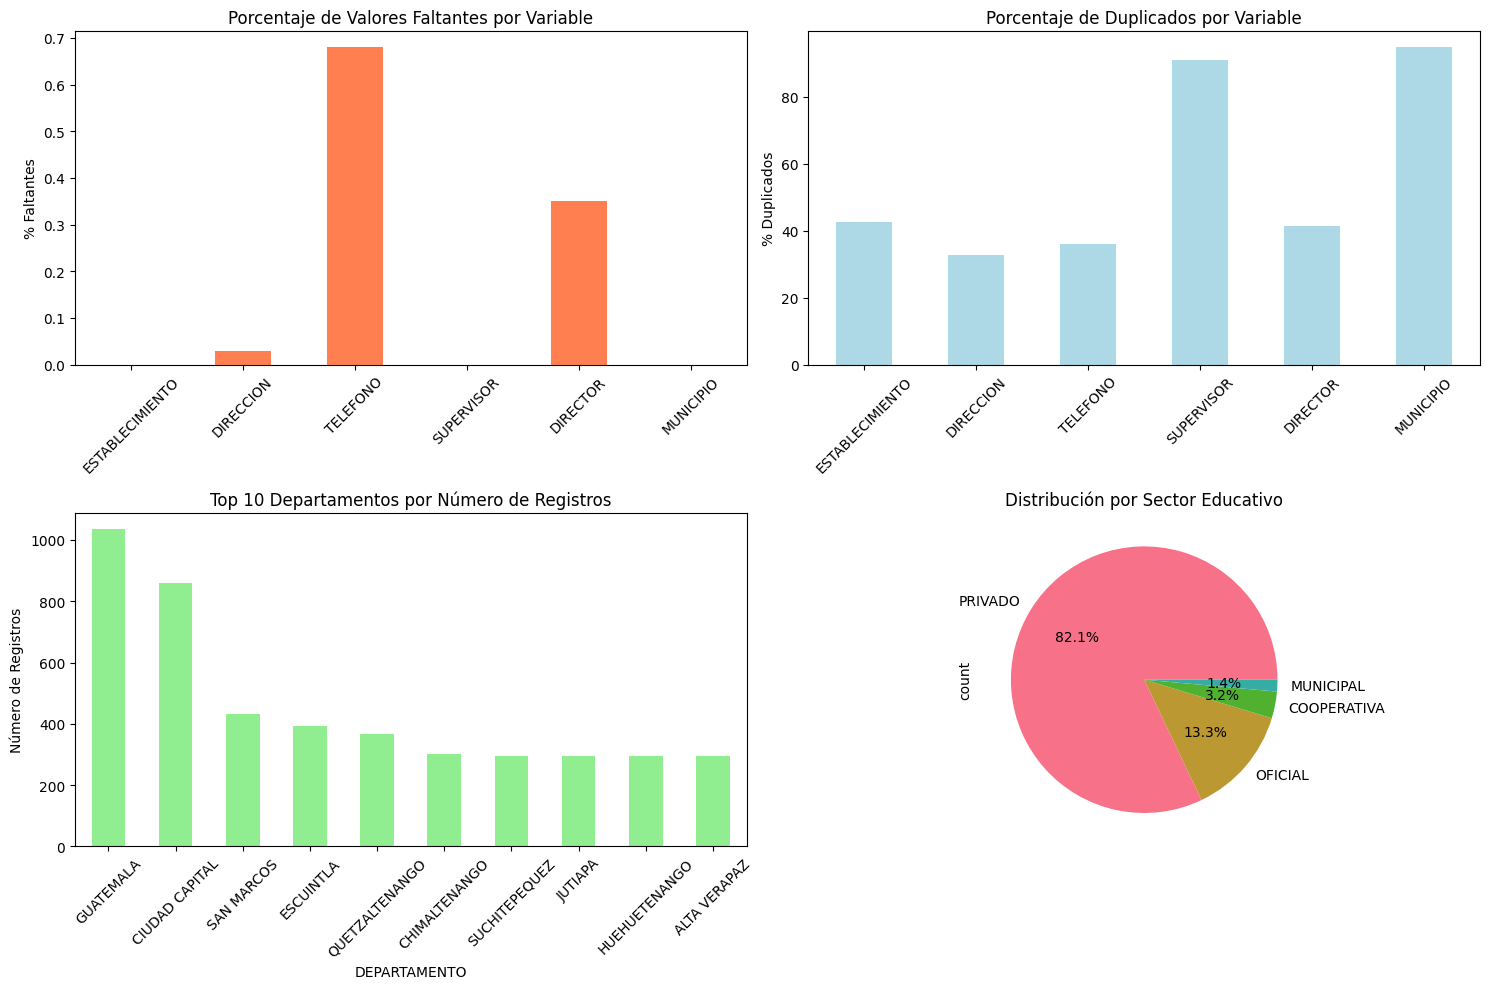

In [9]:
problematic_vars = ['ESTABLECIMIENTO', 'DIRECCION', 'TELEFONO', 'SUPERVISOR', 'DIRECTOR', 'MUNICIPIO']

analysis_results = {}
for var in problematic_vars:
    if var in df_original.columns:
        analysis_results[var] = {
            'total': len(df_original),
            'unique': df_original[var].nunique(),
            'missing': df_original[var].isna().sum(),
            'duplicates': df_original[var].duplicated().sum()
        }

summary_df = pd.DataFrame(analysis_results).T
summary_df['missing_pct'] = (summary_df['missing'] / summary_df['total'] * 100).round(2)
summary_df['duplicate_pct'] = (summary_df['duplicates'] / summary_df['total'] * 100).round(2)

print("\nRESUMEN DE VARIABLES PROBLEMÁTICAS:")
display(summary_df)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

summary_df['missing_pct'].plot(kind='bar', ax=axes[0,0], color='coral')
axes[0,0].set_title('Porcentaje de Valores Faltantes por Variable')
axes[0,0].set_ylabel('% Faltantes')
axes[0,0].tick_params(axis='x', rotation=45)

summary_df['duplicate_pct'].plot(kind='bar', ax=axes[0,1], color='lightblue')
axes[0,1].set_title('Porcentaje de Duplicados por Variable')
axes[0,1].set_ylabel('% Duplicados')
axes[0,1].tick_params(axis='x', rotation=45)

df_original['DEPARTAMENTO'].value_counts().head(10).plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Top 10 Departamentos por Número de Registros')
axes[1,0].set_ylabel('Número de Registros')
axes[1,0].tick_params(axis='x', rotation=45)

if 'SECTOR' in df_original.columns:
    df_original['SECTOR'].value_counts().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
    axes[1,1].set_title('Distribución por Sector Educativo')

plt.tight_layout()
plt.show()

In [10]:
df_clean = df_original.copy()
cleaning_stats = {
    'registros_originales': len(df_clean),
    'duplicados_removidos': 0,
    'establecimientos_estandarizados': 0,
    'direcciones_corregidas': 0,
    'telefonos_validados': 0,
    'nombres_limpiados': 0
}


columnas_originales = len(df_clean.columns)
df_clean = df_clean.dropna(axis=1, how='all')
columnas_eliminadas = columnas_originales - len(df_clean.columns)
print(f"Columnas vacías eliminadas: {columnas_eliminadas}")

if 'CODIGO' in df_clean.columns:
    registros_antes = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=['CODIGO'], keep='first')
    duplicados = registros_antes - len(df_clean)
    cleaning_stats['duplicados_removidos'] = duplicados
    print(f"Duplicados eliminados: {duplicados}")

if 'ESTABLECIMIENTO' in df_clean.columns:
    df_clean['ESTABLECIMIENTO_LIMPIO'] = df_clean['ESTABLECIMIENTO'].apply(normalizar_texto)
    
    establishment_mapping, similar_groups = encontrar_similar(df_clean['ESTABLECIMIENTO_LIMPIO'])
    
    if establishment_mapping:
        df_clean['ESTABLECIMIENTO_LIMPIO'] = df_clean['ESTABLECIMIENTO_LIMPIO'].replace(establishment_mapping)
        cleaning_stats['establecimientos_estandarizados'] = len(establishment_mapping)
        
        print(f"   Establecimientos estandarizados: {len(establishment_mapping)}")
        print("   Grupos similares encontrados:")
        for group in similar_groups[:5]: 
            print(f"      • '{group['standard']}' <- {group['count']} variaciones")

if 'DIRECCION' in df_clean.columns:
    df_clean['DIRECCION_LIMPIA'] = df_clean['DIRECCION'].apply(limpiar_dir)
    
    direcciones_corregidas = (df_clean['DIRECCION'] != df_clean['DIRECCION_LIMPIA']).sum()
    cleaning_stats['direcciones_corregidas'] = direcciones_corregidas
    print(f"   Direcciones corregidas: {direcciones_corregidas}")

if 'TELEFONO' in df_clean.columns:
    df_clean['TELEFONO_LIMPIO'] = df_clean['TELEFONO'].apply(limpiar_numero_telefono)
    
    telefonos_validos = df_clean['TELEFONO_LIMPIO'].notna().sum()
    tasa_validacion = (telefonos_validos / len(df_clean)) * 100
    cleaning_stats['telefonos_validados'] = telefonos_validos
    print(f"   Teléfonos válidos: {telefonos_validos:,} ({tasa_validacion:.1f}%)")

for col, col_clean in [('DIRECTOR', 'DIRECTOR_LIMPIO'), ('SUPERVISOR', 'SUPERVISOR_LIMPIO')]:
    if col in df_clean.columns:
        print(f"\nLimpiando {col.lower()}s...")
        df_clean[col_clean] = df_clean[col].apply(limpiar_nombres)
        nombres_limpiados = (df_clean[col] != df_clean[col_clean]).sum()
        cleaning_stats['nombres_limpiados'] += nombres_limpiados
        print(f"   {col}s limpiados: {nombres_limpiados}")

if 'MUNICIPIO' in df_clean.columns:
    df_clean['MUNICIPIO_LIMPIO'] = df_clean['MUNICIPIO'].apply(normalizar_texto)
    
    municipality_fixes = {
        'COBAN': 'COBÁN', 'SALAMA': 'SALAMÁ', 
        'SOLOLA': 'SOLOLÁ', 'TOTONICAPAN': 'TOTONICAPÁN'
    }
    df_clean['MUNICIPIO_LIMPIO'] = df_clean['MUNICIPIO_LIMPIO'].replace(municipality_fixes)
    print(f"  Municipios normalizados")

categorical_columns = ['AREA', 'SECTOR', 'MODALIDAD', 'JORNADA', 'PLAN']
for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[f'{col}_LIMPIO'] = df_clean[col].apply(normalizar_texto)

cleaning_stats['registros_finales'] = len(df_clean)

print(f"Registros finales: {len(df_clean):,}")

Columnas vacías eliminadas: 1
Duplicados eliminados: 0
   Establecimientos estandarizados: 1759
   Grupos similares encontrados:
      • 'ESCUELA NACIONAL DE CIENCIAS COMERCIALES SECCION NOCTURNA' <- 3 variaciones
      • 'COLEGIO LA SALLE' <- 2 variaciones
      • 'COLEGIO MUNDO VERDE' <- 2 variaciones
      • 'COLEGIO MIXTO PRE-UNIVERSITARIO GALILEO GALILEI' <- 2 variaciones
      • 'INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA' <- 31 variaciones
   Direcciones corregidas: 1317
   Teléfonos válidos: 6,521 (99.0%)

Limpiando directors...
   DIRECTORs limpiados: 2382

Limpiando supervisors...
   SUPERVISORs limpiados: 1017
  Municipios normalizados
Registros finales: 6,584


ESTADÍSTICAS DE LIMPIEZA:
• Registros Originales: 6,584
• Duplicados Removidos: 0
• Establecimientos Estandarizados: 1,759
• Direcciones Corregidas: 1,317
• Telefonos Validados: 6,521
• Nombres Limpiados: 3,399
• Registros Finales: 6,584
• Tasa de retención: 100.00%


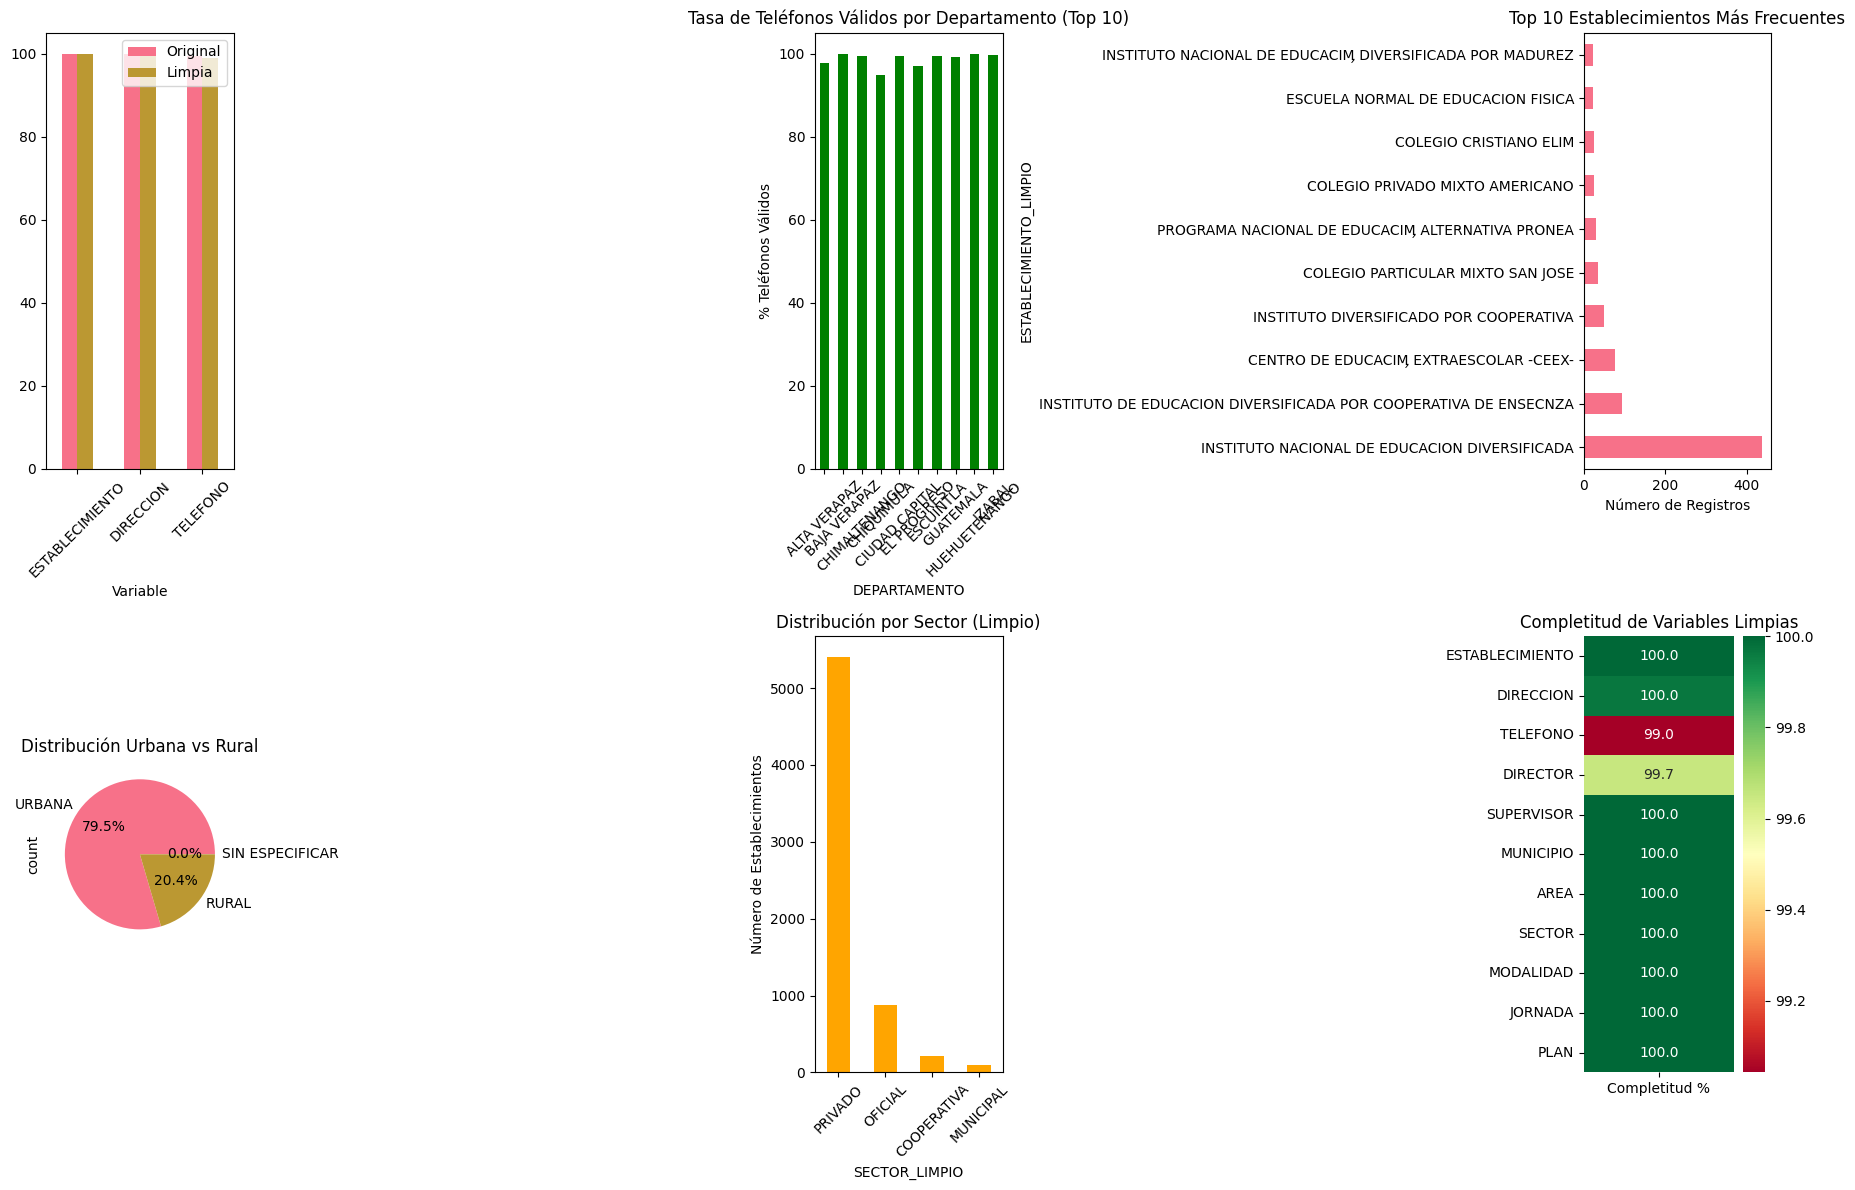

In [11]:
print("ESTADÍSTICAS DE LIMPIEZA:")
for key, value in cleaning_stats.items():
    print(f"• {key.replace('_', ' ').title()}: {value:,}")

tasa_retencion = (cleaning_stats['registros_finales'] / cleaning_stats['registros_originales']) * 100
print(f"• Tasa de retención: {tasa_retencion:.2f}%")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

variables_limpieza = [
    ('ESTABLECIMIENTO', 'ESTABLECIMIENTO_LIMPIO'),
    ('DIRECCION', 'DIRECCION_LIMPIA'), 
    ('TELEFONO', 'TELEFONO_LIMPIO')
]

completeness_comparison = []
for original, cleaned in variables_limpieza:
    if original in df_clean.columns and cleaned in df_clean.columns:
        original_complete = ((df_clean[original].notna()) & (df_clean[original] != "")).sum()
        cleaned_complete = ((df_clean[cleaned].notna()) & (df_clean[cleaned] != "")).sum()
        
        completeness_comparison.append({
            'Variable': original,
            'Original': (original_complete / len(df_clean)) * 100,
            'Limpia': (cleaned_complete / len(df_clean)) * 100
        })

comp_df = pd.DataFrame(completeness_comparison)
if not comp_df.empty:
    comp_df.set_index('Variable')[['Original', 'Limpia']].plot(kind='bar', ax=axes[0,0])
    axes[0,0].tick_params(axis='x', rotation=45)

if 'TELEFONO_LIMPIO' in df_clean.columns:
    phone_by_dept = df_clean.groupby('DEPARTAMENTO').agg({
        'TELEFONO_LIMPIO': lambda x: x.notna().sum(),
        'CODIGO': 'count'
    })
    phone_by_dept['tasa_telefono'] = (phone_by_dept['TELEFONO_LIMPIO'] / phone_by_dept['CODIGO'] * 100)
    
    phone_by_dept['tasa_telefono'].head(10).plot(kind='bar', ax=axes[0,1], color='green')
    axes[0,1].set_title('Tasa de Teléfonos Válidos por Departamento (Top 10)')
    axes[0,1].set_ylabel('% Teléfonos Válidos')
    axes[0,1].tick_params(axis='x', rotation=45)

if 'ESTABLECIMIENTO_LIMPIO' in df_clean.columns:
    top_est = df_clean['ESTABLECIMIENTO_LIMPIO'].value_counts().head(10)
    top_est.plot(kind='barh', ax=axes[0,2])
    axes[0,2].set_title('Top 10 Establecimientos Más Frecuentes')
    axes[0,2].set_xlabel('Número de Registros')

if 'AREA' in df_clean.columns:
    area_dist = df_clean['AREA'].value_counts()
    area_dist.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
    axes[1,0].set_title('Distribución Urbana vs Rural')

if 'SECTOR_LIMPIO' in df_clean.columns:
    sector_dist = df_clean['SECTOR_LIMPIO'].value_counts()
    sector_dist.plot(kind='bar', ax=axes[1,1], color='orange')
    axes[1,1].set_title('Distribución por Sector (Limpio)')
    axes[1,1].set_ylabel('Número de Establecimientos')
    axes[1,1].tick_params(axis='x', rotation=45)

variables_completitud = [col for col in df_clean.columns if col.endswith('_LIMPIO') or col.endswith('_LIMPIA')]
completitud_data = []

for var in variables_completitud:
    completitud = ((df_clean[var].notna()) & (df_clean[var] != "")).sum() / len(df_clean) * 100
    completitud_data.append([var.replace('_LIMPIO', '').replace('_LIMPIA', ''), completitud])

if completitud_data:
    comp_matrix = pd.DataFrame(completitud_data, columns=['Variable', 'Completitud'])
    comp_matrix = comp_matrix.set_index('Variable')['Completitud'].values.reshape(-1, 1)
    
    sns.heatmap(comp_matrix, 
                yticklabels=[item[0] for item in completitud_data],
                xticklabels=['Completitud %'],
                annot=True, fmt='.1f', cmap='RdYlGn',
                ax=axes[1,2])
    axes[1,2].set_title('Completitud de Variables Limpias')

plt.tight_layout()
plt.show()

In [12]:
consolidated_file = output_folder / "guatemala_educacion_limpio.csv"
df_clean.to_csv(consolidated_file, index=False, encoding='utf-8')
print(f"Dataset consolidado guardado: {consolidated_file}")

departamentos_guardados = 0
for dept in df_clean['DEPARTAMENTO'].unique():
    dept_data = df_clean[df_clean['DEPARTAMENTO'] == dept]
    dept_file = output_folder / f"{dept.lower().replace(' ', '_')}_limpio.csv"
    dept_data.to_csv(dept_file, index=False, encoding='utf-8')
    departamentos_guardados += 1

print(f"Archivos por departamento: {departamentos_guardados}")

Dataset consolidado guardado: datasets_limpios/guatemala_educacion_limpio.csv
Archivos por departamento: 23
